# 04 PyTorch Custom Datasets Notebook

Get our own data into PyTorch - via custom datasets



## 0. Importing PyTorch and Setting Up Device Agnostic Code

In [ ]:
import torch
from torch import nn

print(f"torch version {torch.__version__}")

torch version 2.3.0+cu121


In [15]:
# setup device-agnostic code for gpu / mps / cpu
device = "cuda" if torch.cuda.is_available() else ("mps" if torch.backends.mps.is_available() else "cpu")
print(f"on device {device}")

on device cpu


## 1. Get data

Subset of Food101 dataset

Try things on a small scale and increase scale when necessary, speed up experiment

In [27]:
import requests
import zipfile
from pathlib import Path

# setup device agnostic path
data_path = Path.home() / "data/" if device == "mps" else Path("data/")
image_path = data_path/ "pizza_steak_sushi"

if image_path.is_dir():
  print(f"{image_path} directory already exists...skipping download")
else:
  print(f"{image_path} does not exist, creating one...")
  image_path.mkdir(parents=True, exist_ok=True)

# Download pizza, steak and sushi data
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  print(f"Downloading pizza, steak, sushi data...")
  f.write(request.content)

# Unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path/ "pizza_steak_sushi.zip", "r") as zip_ref:
  print("Unzipping pizza, steak and sushi data...")
  zip_ref.extractall(image_path)



data/pizza_steak_sushi directory already exists...skipping download
Unzipping pizza, steak and sushi data...


## 2. Becoming one with the data (data prep and exploration)

In [24]:
import os
def walk_through_dir(dir_path):
  """Walk throught dir_path returning its contents."""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'. ")


In [28]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi'. 
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'. 
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'. 
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'. 
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'. 
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'. 
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'. 
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'. 
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'. 


In [26]:
# setup train and test paths
train_dir = image_path/ "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

### 2.1 Visualizing images

1. get all of the image paths
2. pick a random image path using Python's `randome.choice()`
3. get the img class name using `pathlib.Path.parent.stem`
4. viz img with Python's Pillow  `PIL`
5. show the img metadata

Random image path: data/pizza_steak_sushi/test/steak/3424937.jpg
Image class: steak
Image height: 512
Image width: 512


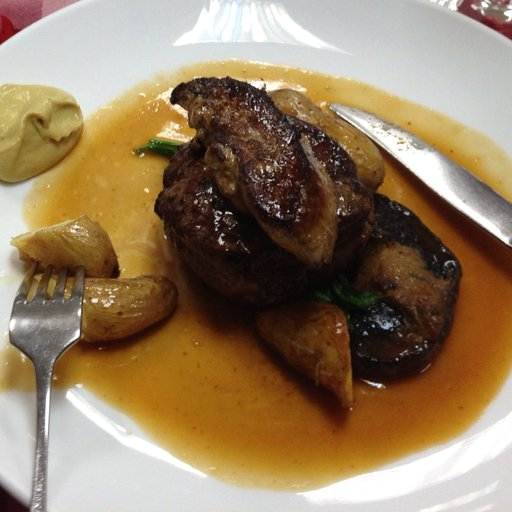

In [48]:
import random
from PIL import Image

# set seed
#random.seed(42)

# 1. get all the img paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. pick a random image path
random_image_path = random.choice(image_path_list)

# 3. get image class from path name (name of dir)
image_class = random_image_path.parent.stem

# 4. open img
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
# device agnostic img show
if device == "mps":
  img.show()
else:
  display(img)